### K-Means Clustering

In [6]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/CustomerData.csv"
r = requests.get(url)

with open("CustomerData.csv", "wb") as f:
    f.write(r.content)

import pandas as pd
df = pd.read_csv("CustomerData.csv", index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


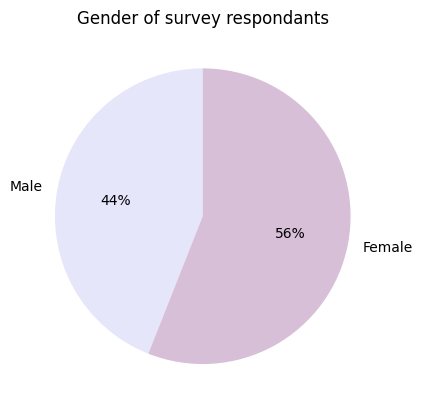

In [9]:
num_male = df[df['Gender'] == 'Male'].shape[0]
num_female = df[df['Gender'] == 'Female'].shape[0]
plt.pie(
    [num_male, num_female],
    labels=['Male', 'Female'],
    startangle=90,
    autopct='%1.f%%',
    colors=['lavender', 'thistle'])
plt.title('Gender of survey respondants')
plt.show()

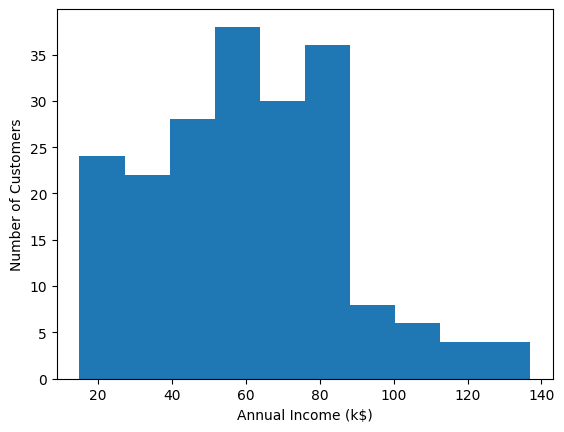

In [10]:
plt.hist(df['Annual Income (k$)'], bins=10)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.show()

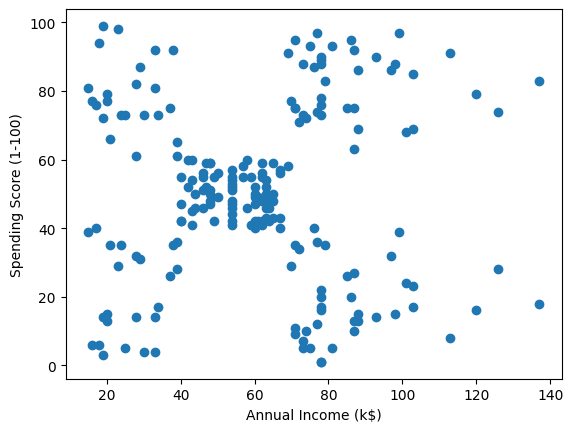

In [11]:
xlabel = 'Annual Income (k$)'
ylabel = 'Spending Score (1-100)'
X = df[[xlabel, ylabel]]
plt.scatter(X[xlabel], X[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [12]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


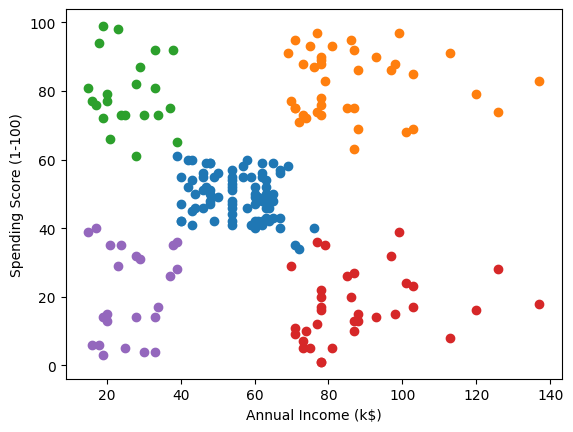

In [13]:
for label in np.unique(km.labels_):
    X_ = X[label == km.labels_]
    plt.scatter(X_['Annual Income (k$)'], X_['Spending Score (1-100)'], label=label)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [17]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/cameraman.png"

response = requests.get(url)
with open("cameraman.png", "wb") as f:
    f.write(response.content)

The image is 490px by 487px


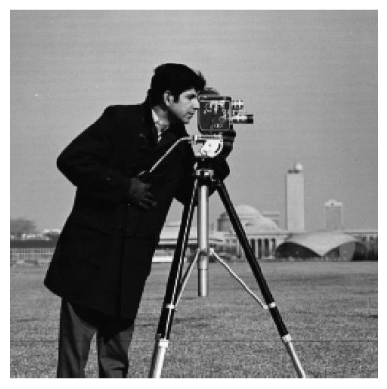

In [18]:
import matplotlib.pyplot as plt

img = plt.imread('cameraman.png')

print(f'The image is {img.shape[0]}px by {img.shape[1]}px')

plt.axis('off')
plt.imshow(img, cmap='gray')   # force grayscale display
plt.show()

In [19]:
k = 2

X = img.reshape(-1, 1)
km = KMeans(n_clusters=k, random_state=42)

In [20]:
km.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


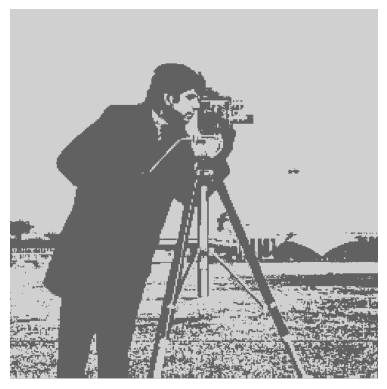

In [21]:
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape)
plt.axis('off')
plt.imshow(seg)

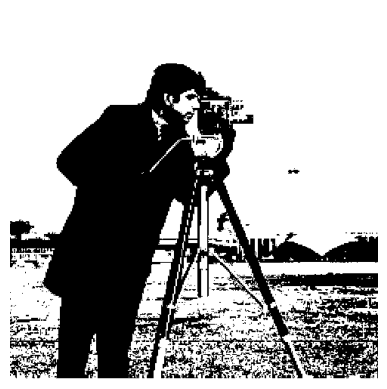

In [22]:
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = 255 if km.cluster_centers_[i] > 0.5 else 0
seg = seg.reshape(img.shape).astype(np.uint8)
plt.axis('off')
plt.imshow(seg)
plt.show()

In [24]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/kingfisher.jpeg"

response = requests.get(url)
with open("kingfisher.jpeg", "wb") as f:
    f.write(response.content)

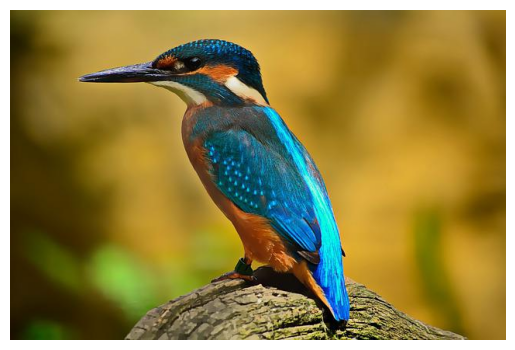

In [25]:
import matplotlib.pyplot as plt

img = plt.imread('kingfisher.jpeg')

plt.axis('off')
plt.imshow(img)
plt.show()

In [26]:
k = 2

X = img.reshape(-1, 3) # Remember, since image is RGB
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


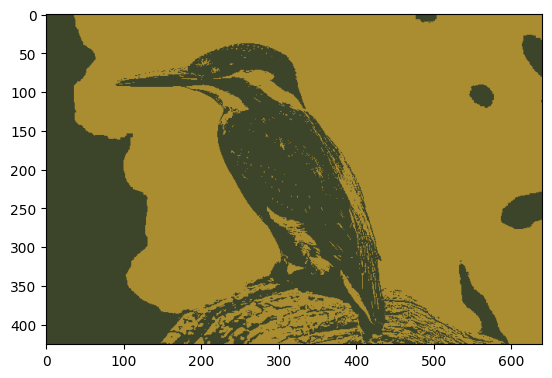

In [27]:
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)

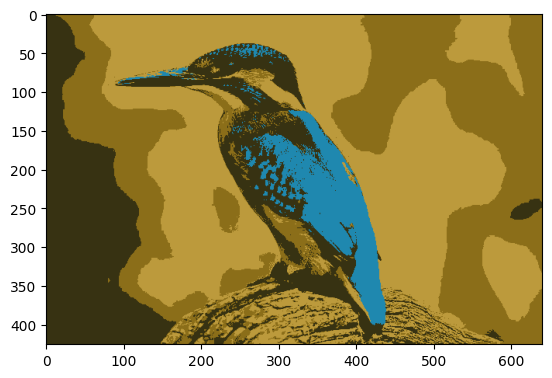

In [28]:
k = 4

X = img.reshape(-1, 3) # Remember, since image is rgb
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)